Dropdown(description='x:', options=('price', 'model_year', 'model', 'condition', 'cylinders', 'fuel', 'odomete…

Dropdown(description='y:', options=('price', 'model_year', 'model', 'condition', 'cylinders', 'fuel', 'odomete…

FigureWidget({
    'data': [{'mode': 'markers',
              'type': 'scatter',
              'uid': '815a932f-6167-41ac-9e6b-a4f771a17bb9',
              'x': array([ 9400, 25500,  5500, ...,  3950,  7455,  6300], dtype=int64),
              'y': array([ 9400, 25500,  5500, ...,  3950,  7455,  6300], dtype=int64)}],
    'layout': {'height': 400, 'template': '...', 'title': {'text': 'price vs price'}}
})

Output()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Number of duplicate rows: 0


price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

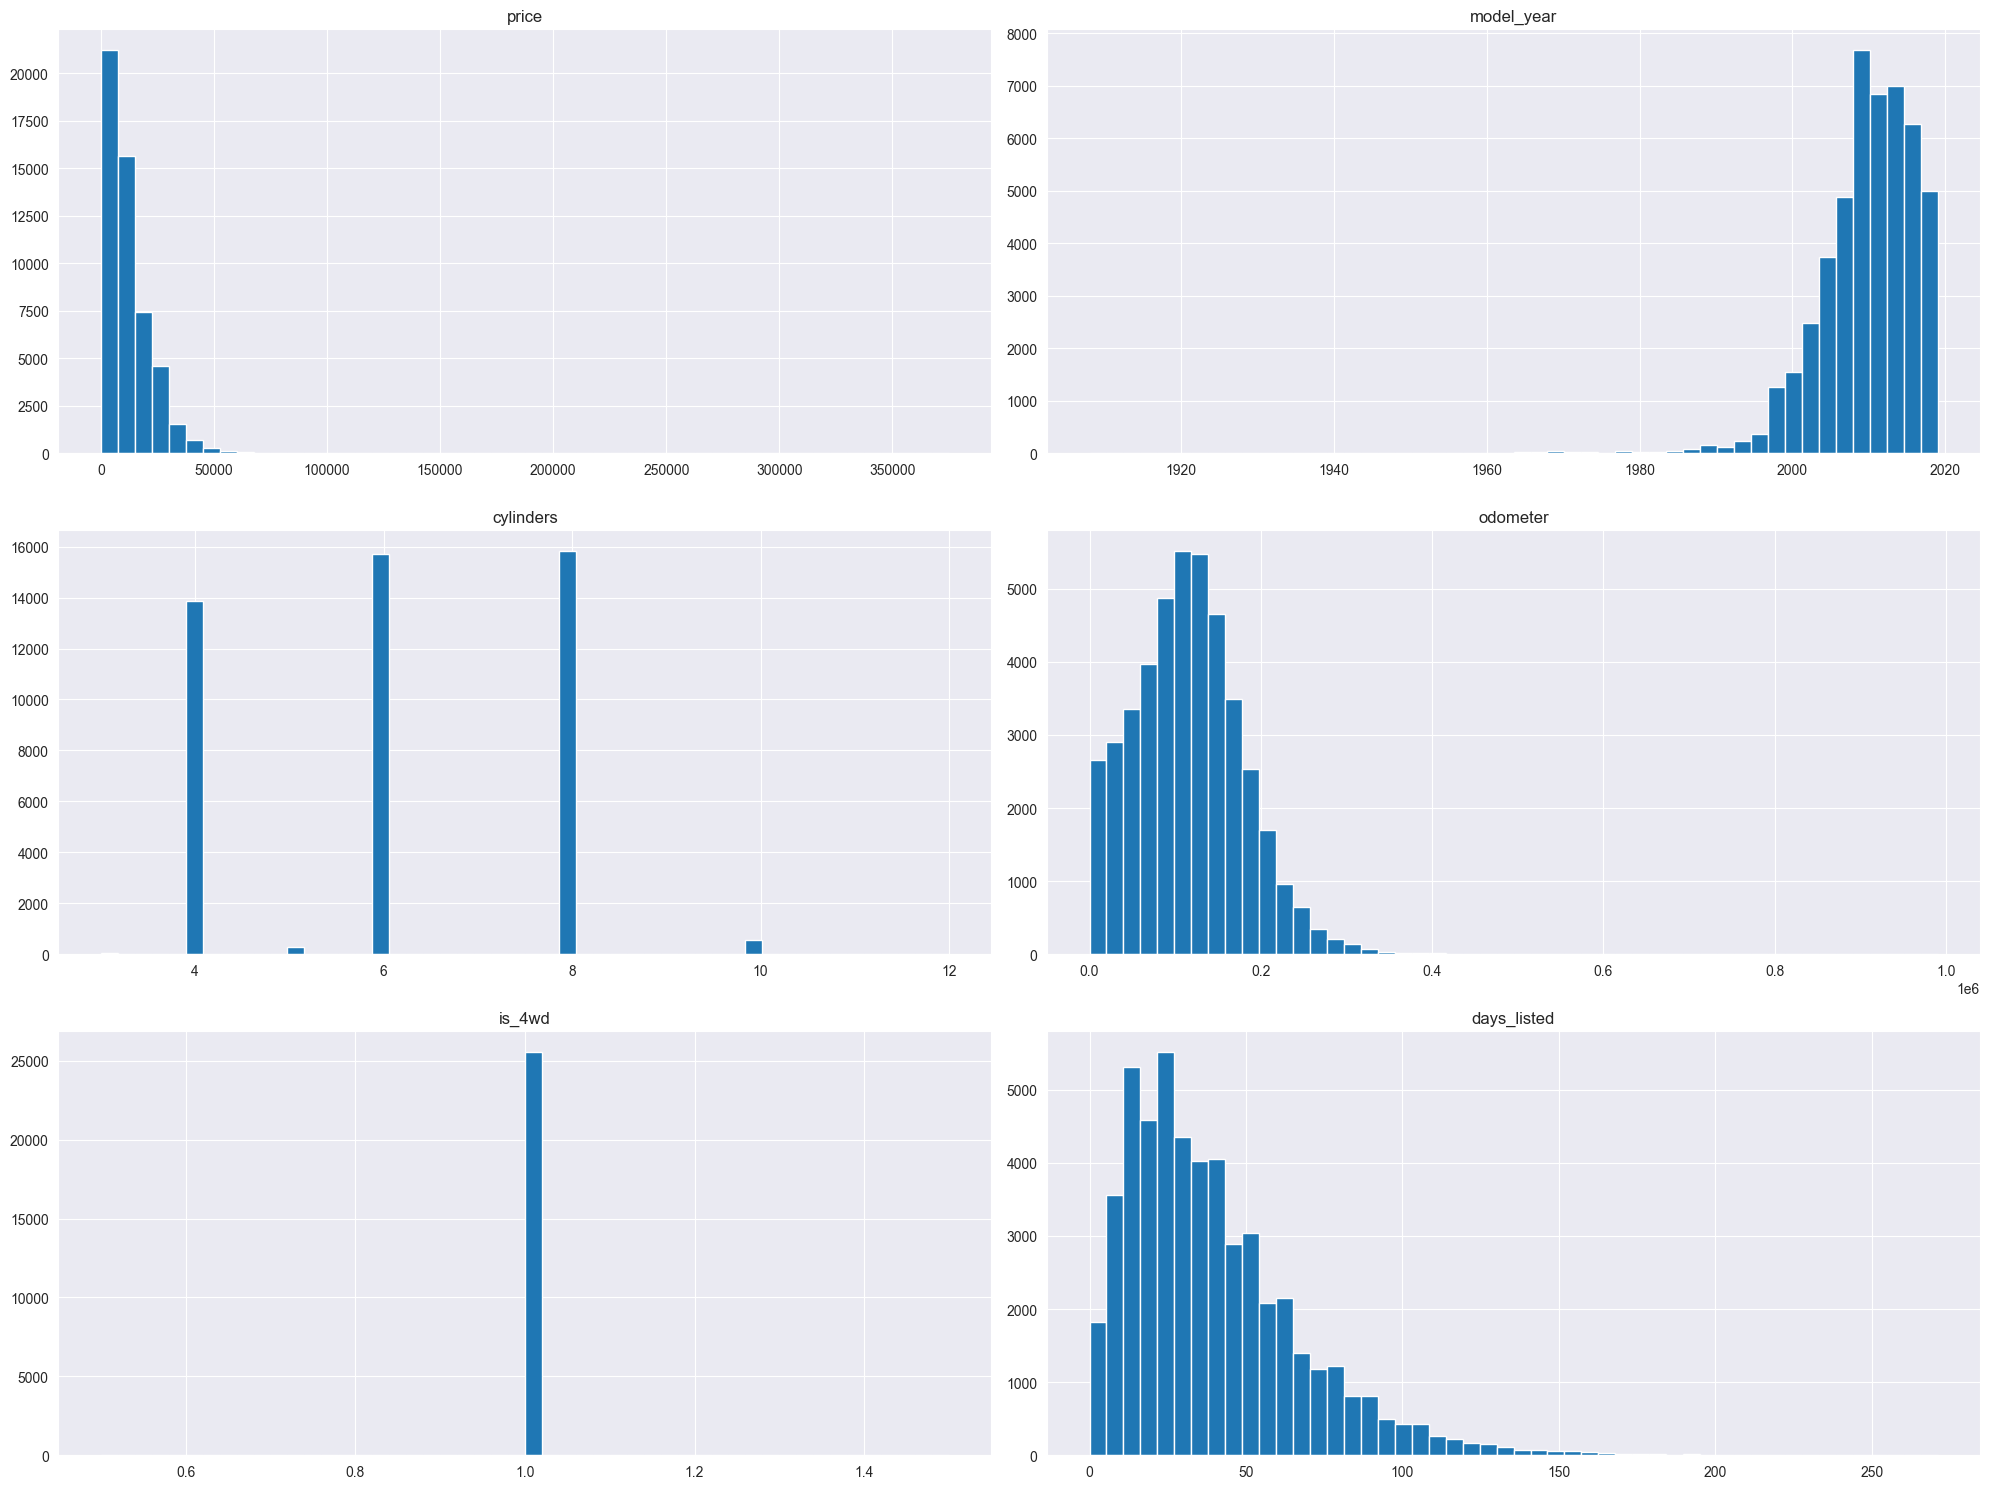

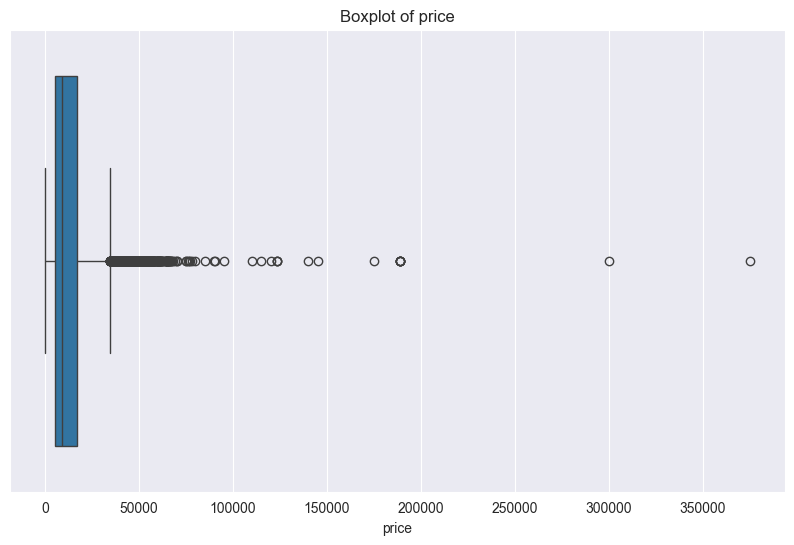

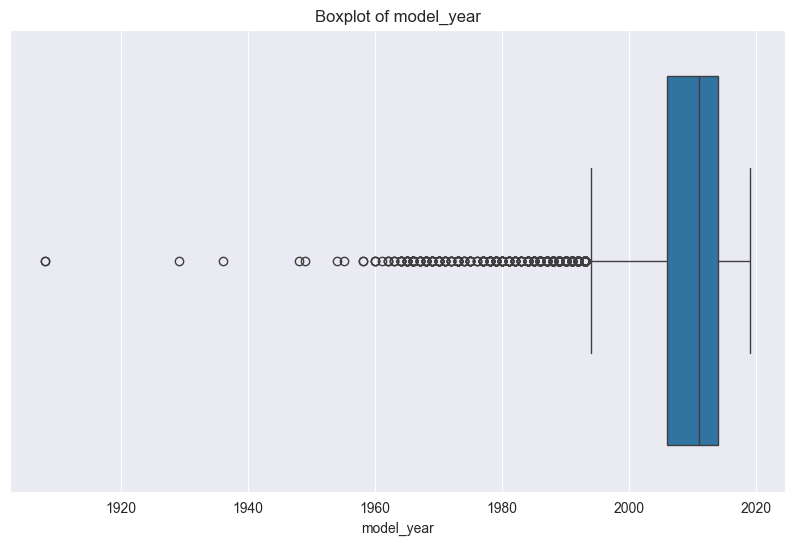

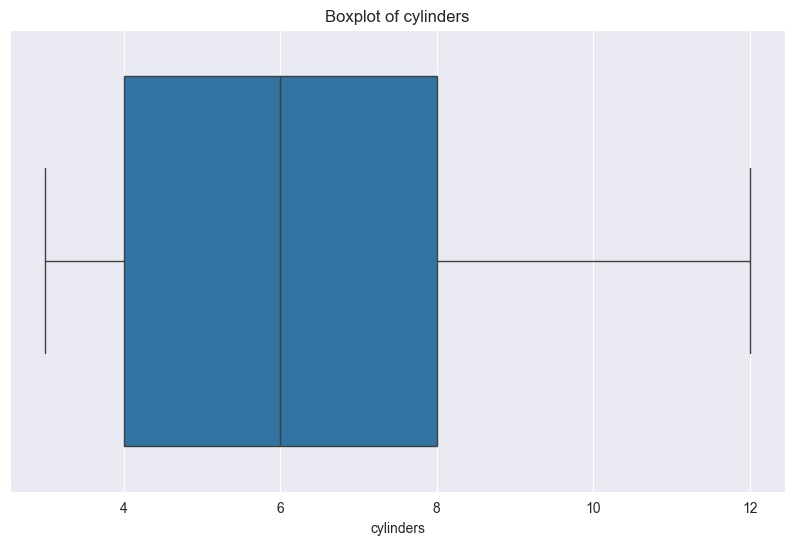

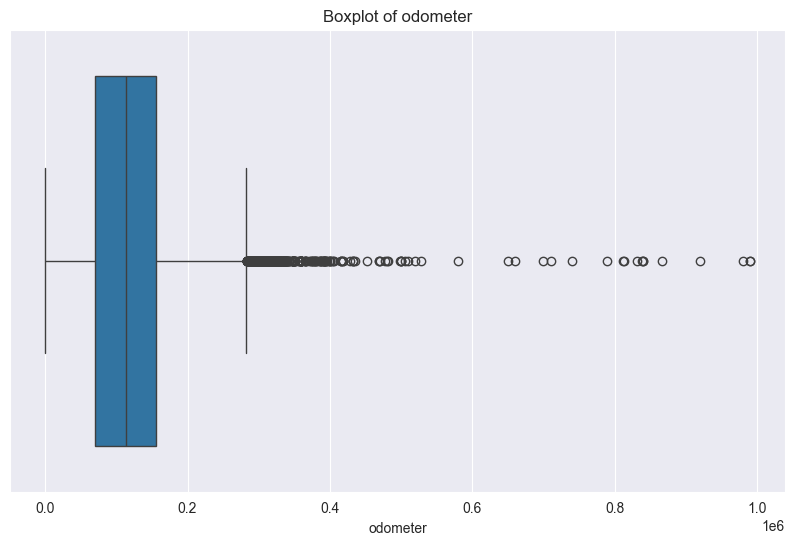

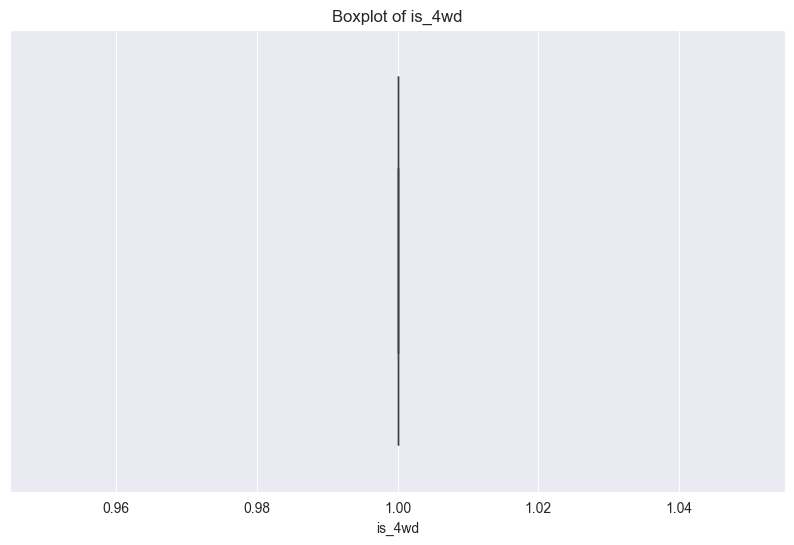

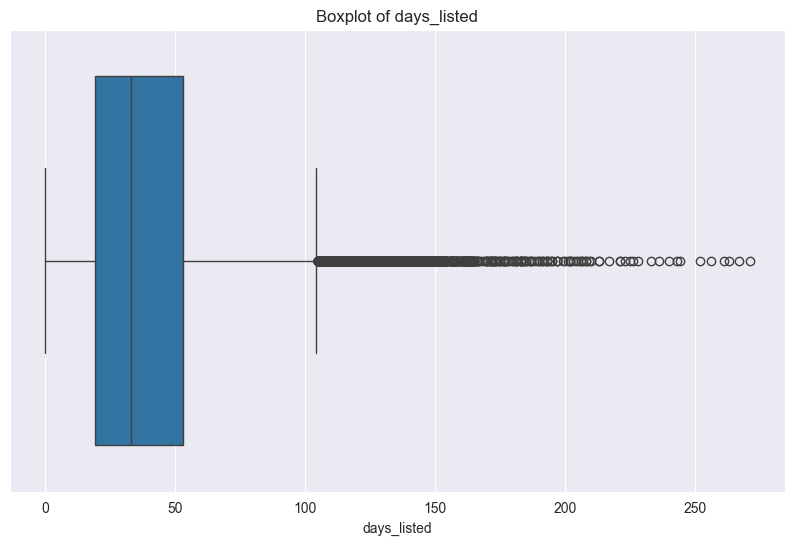

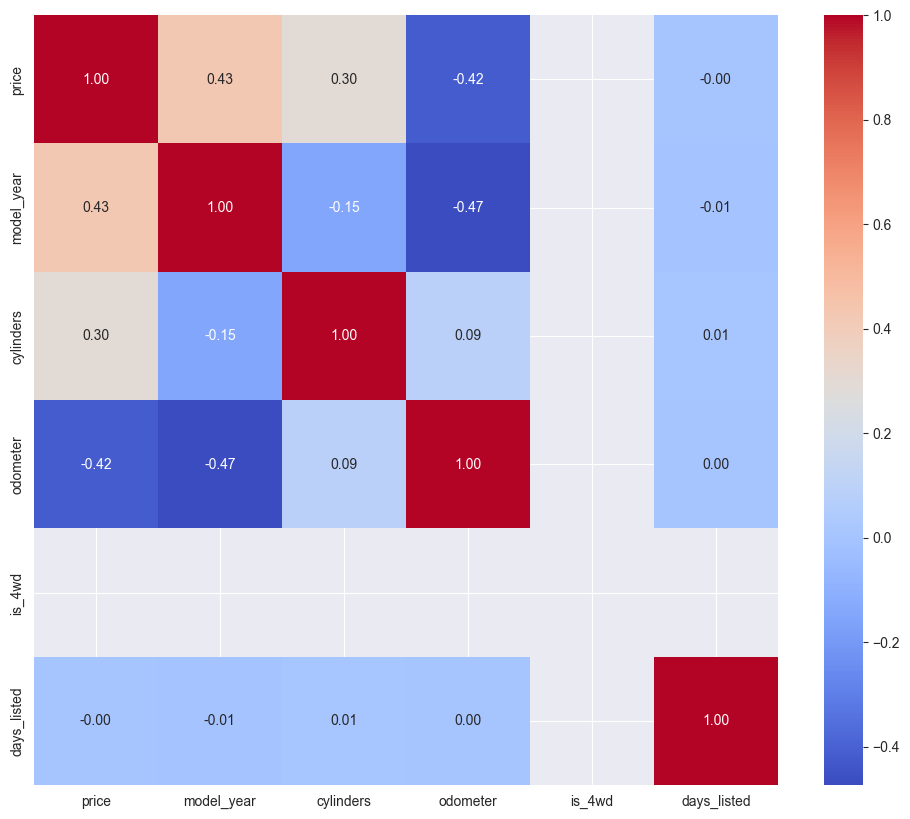

Value counts for model:


model
ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: count, Length: 100, dtype: int64



Value counts for condition:


condition
excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: count, dtype: int64



Value counts for fuel:


fuel
gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: count, dtype: int64



Value counts for transmission:


transmission
automatic    46902
manual        2829
other         1794
Name: count, dtype: int64



Value counts for type:


type
SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: count, dtype: int64



Value counts for paint_color:


paint_color
white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64



Value counts for date_posted:


date_posted
2019-03-17    186
2019-01-05    184
2018-09-20    178
2019-03-11    176
2018-10-09    174
             ... 
2018-06-18    119
2018-07-04    118
2019-01-11    117
2018-06-08    117
2019-01-04    116
Name: count, Length: 354, dtype: int64

interactive(children=(Dropdown(description='manufacturer', options=('bmw', 'ford', 'hyundai', 'chrysler', 'toy…

<function __main__.plot_model_distribution(manufacturer)>

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
vehicles_df = pd.read_csv('vehicles_us.csv')

import ipywidgets as widgets
import plotly.graph_objects as go
from IPython.display import display

# Assuming vehicles_df is your DataFrame,

# create a list of column names
columns = vehicles_df.columns.values.tolist()

# create dropdown widgets for the x and y axes
x_dropdown = widgets.Dropdown(description='x:', options=columns)
y_dropdown = widgets.Dropdown(description='y:', options=columns)


# function to be called when dropdown value changes
def update_plot(x, y):
    trace = go.Scatter(x=vehicles_df[x], y=vehicles_df[y], mode='markers')
    layout = go.Layout(height=400, title=f"{y} vs {x}")
    fig = go.FigureWidget(data=[trace], layout=layout)
    display(fig)


# add observe on dropdown widgets
x_dropdown.observe(lambda change: update_plot(change.new, y_dropdown.value), names='value')
y_dropdown.observe(lambda change: update_plot(x_dropdown.value, change.new), names='value')

# display dropdown widgets
display(x_dropdown, y_dropdown)
# initial plot
update_plot(x_dropdown.value, y_dropdown.value)
def filter_data(dataframe, manufacturer):
    return dataframe[dataframe['manufacturer'] == manufacturer]

def prepare_plot_area():
    plt.figure(figsize=(10, 6))

def plot_model_counts(filtered_dataframe):
    filtered_dataframe['model'].value_counts().plot(kind='bar')

def configure_plot(manufacturer):
    plt.title(f'Distribution of models for {manufacturer}')
    plt.xticks(rotation=90)

def display_plot():
    plt.show()
out = widgets.Output()
with out:
    display(vehicles_df)
display(out)
from ipywidgets import interact
# Display the first few rows of the dataframe
display(vehicles_df.head())

# Display summary statistics
display(vehicles_df.describe())

# Check for missing values
display(vehicles_df.isnull().sum())

# Check for duplicates
duplicates = vehicles_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Data types
display(vehicles_df.dtypes)

# Histograms for numerical columns
vehicles_df.hist(figsize=(20,15), bins=50)
plt.tight_layout()
plt.show()

# Boxplots for numerical columns to identify outliers
numerical_columns = vehicles_df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=vehicles_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(vehicles_df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Pairplot for selected features (optional due to potentially high computation cost)
# sns.pairplot(vehicles_df[['price', 'model_year', 'odometer', 'cylinders']])
# plt.show()

# Analyzing categorical data
categorical_columns = vehicles_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Value counts for {col}:")
    display(vehicles_df[col].value_counts())
    print("\n")

    # Extract manufacturer from model column
vehicles_df['manufacturer'] = vehicles_df['model'].apply(lambda x: x.split(' ')[0])

# Interactive plot for distribution of models by manufacturer
def plot_model_distribution(manufacturer):
    global vehicles_df
    filtered_dataframe = filter_data(vehicles_df, manufacturer)
    prepare_plot_area()
    plot_model_counts(filtered_dataframe)
    configure_plot(manufacturer)
    display_plot()


def filter_data(dataframe, manufacturer):
    return dataframe[dataframe['manufacturer'] == manufacturer]


def prepare_plot_area():
    plt.figure(figsize=(10, 6))


def plot_model_counts(filtered_dataframe):
    filtered_dataframe['model'].value_counts().plot(kind='bar')


def configure_plot(manufacturer):
    plt.title(f'Distribution of models for {manufacturer}')
    plt.xticks(rotation=90)


def display_plot():
    plt.show()

manufacturers = vehicles_df['manufacturer'].unique()
interact(plot_model_distribution, manufacturer=manufacturers)